## Data Scientist Salary Data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
plt.rcParams['figure.figsize']=[15,7]

In [2]:
#loading dataa
data=pd.read_csv("~/Downloads/ds_salaries.csv")

In [58]:
df=pd.read_csv("~/Downloads/ds_salaries.csv")

In [3]:
#printing data head
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
#data shape
data.shape

# 607 rows and 12 columns

(607, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
#lets find out numerical columns
nums=data.select_dtypes(include=np.number).columns

In [8]:
nums

Index(['Unnamed: 0', 'work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [9]:
#Categorical columns
cat=data.select_dtypes(exclude=np.number).columns

In [10]:
cat

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [11]:
#check null entries
data.isnull().sum()

# we dont have null/missing enteries in our data

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
data['Unnamed: 0'].unique()

# this column is of no use for us lets drop it


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [15]:
#for our analysis we need salary column to be in same scale 
#lets keep the salary in usd and drop the other two
data.drop(['salary','salary_currency'],axis=1,inplace=True)

In [16]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [17]:
data['work_year'].unique(),data['experience_level'].unique()

(array([2020, 2021, 2022], dtype=int64),
 array(['MI', 'SE', 'EN', 'EX'], dtype=object))

In [18]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [19]:
#company size 
data['company_size'].unique()

# we have only categories and these can be ranked lets do replacing
data['company_size'].replace({"S":0,'M':1,'L':2},inplace=True)

In [20]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,2
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,0
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,1
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,0
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Big Data Engineer'),
  Text(3, 0, 'Product Data Analyst'),
  Text(4, 0, 'Machine Learning Engineer'),
  Text(5, 0, 'Data Analyst'),
  Text(6, 0, 'Lead Data Scientist'),
  Text(7, 0, 'Business Data Analyst'),
  Text(8, 0, 'Lead Data Engineer'),
  Text(9, 0, 'Lead Data Analyst'),
  Text(10, 0, 'Data Engineer'),
  Text(11, 0, 'Data Science Consultant'),
  Text(12, 0, 'BI Data Analyst'),
  Text(13, 0, 'Director of Data Science'),
  Text(14, 0, 'Research Scientist'),
  Text(15, 0, 'Machine Learning Manager'),
  Text(16, 0, 'Data Engineering Manager'),
  Text(17, 0, 'Machine Learning Infrastructure Engineer'),
  Text(18, 0, 'ML Engineer'),
  Text(19, 0, 'AI Scientist'),
  Text(20, 

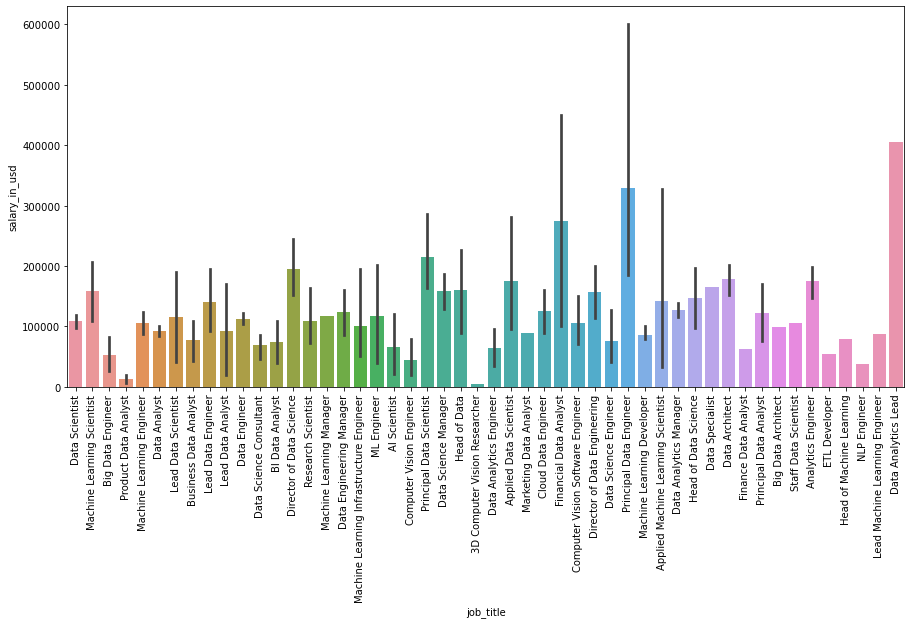

In [21]:
sns.barplot(data=data,x='job_title',y='salary_in_usd')
plt.xticks(rotation=90)

In [22]:
# we can see  from here that principal data engineer ,data analytics lead are taking more salaries.

In [23]:
data.set_index(data['job_title'])
#here we have a lot o9f values and expcept above 8-10 enteries we have very less data so lets deal with the

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
job_title,,,,,,,,,
Data Scientist,2020,MI,FT,Data Scientist,79833,DE,0,DE,2
Machine Learning Scientist,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,0
Big Data Engineer,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,1
Product Data Analyst,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,0
Machine Learning Engineer,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,2
...,...,...,...,...,...,...,...,...,...
Data Engineer,2022,SE,FT,Data Engineer,154000,US,100,US,1
Data Engineer,2022,SE,FT,Data Engineer,126000,US,100,US,1
Data Analyst,2022,SE,FT,Data Analyst,129000,US,0,US,1


In [24]:
data['job_title'].value_counts()

lst=['Data Scientist','Data Engineer','Data Analyst','Machine Learning Engineer','Research Scientist',
     'Data Science Manager','Data Architect','Big Data Engineer','Machine Learning Scientist']


In [25]:
def new(x):
    if x in lst:
        return x
    
    else:
        return ('Others')

In [26]:
data['job_title']=data['job_title'].apply(new)

In [27]:
data['job_title'].value_counts()

Data Scientist                143
Others                        139
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Name: job_title, dtype: int64

In [28]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,2
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,0
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,1
3,2020,MI,FT,Others,20000,HN,0,HN,0
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,2


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Big Data Engineer'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Machine Learning Engineer'),
  Text(5, 0, 'Data Analyst'),
  Text(6, 0, 'Data Engineer'),
  Text(7, 0, 'Research Scientist'),
  Text(8, 0, 'Data Science Manager'),
  Text(9, 0, 'Data Architect')])

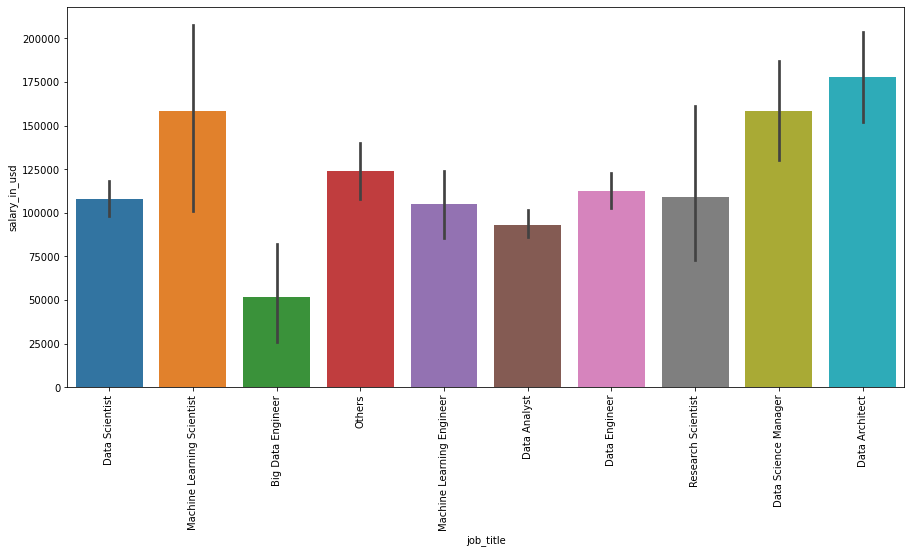

In [29]:
sns.barplot(data=data,x='job_title',y='salary_in_usd')
plt.xticks(rotation=90)

In [30]:
#data Architect is leading in this visualization

In [31]:
data['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='salary_in_usd'>

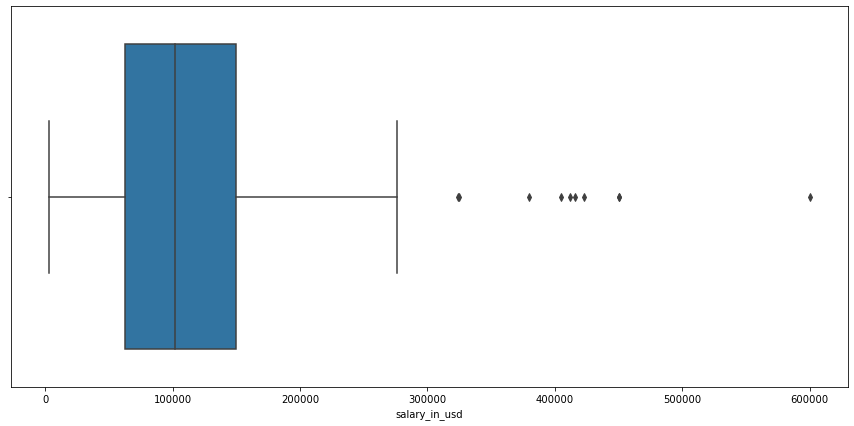

In [32]:
sns.boxplot(data['salary_in_usd'])

In [33]:
# we have many outliers here as well we have to treat this column as well but that could  be beacause of some
#single enteries as top levels have less position in company

In [34]:
data['employment_type'].value_counts()
# as we can see that we have a very enteries other than full time so lets drop this columns 

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [35]:
data.drop('employment_type',inplace=True,axis=1)

In [36]:
data.head()

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Data Scientist,79833,DE,0,DE,2
1,2020,SE,Machine Learning Scientist,260000,JP,0,JP,0
2,2020,SE,Big Data Engineer,109024,GB,50,GB,1
3,2020,MI,Others,20000,HN,0,HN,0
4,2020,SE,Machine Learning Engineer,150000,US,50,US,2


In [37]:
#employee residence
data['employee_residence'].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [38]:
l=['US','GB','CA','IN','DE']


In [39]:
def residence(x):
    if x in l:
        return x
    
    else:
        return ('others')

In [40]:
data['employee_residence']=data['employee_residence'].apply(residence)

In [41]:
data['employee_residence'].value_counts()

US        332
others    147
GB         44
IN         30
CA         29
DE         25
Name: employee_residence, dtype: int64

In [42]:
#company location
data['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [43]:
#  company location is somehow have some common enteries of location so we can apply same function here as well
data['company_location']=data['company_location'].apply(residence)

In [44]:
data['company_location'].value_counts()

US        355
others    123
GB         47
CA         30
DE         28
IN         24
Name: company_location, dtype: int64

In [45]:
data.head(20)

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Data Scientist,79833,DE,0,DE,2
1,2020,SE,Machine Learning Scientist,260000,others,0,others,0
2,2020,SE,Big Data Engineer,109024,GB,50,GB,1
3,2020,MI,Others,20000,others,0,others,0
4,2020,SE,Machine Learning Engineer,150000,US,50,US,2
5,2020,EN,Data Analyst,72000,US,100,US,2
6,2020,SE,Others,190000,US,100,US,0
7,2020,MI,Data Scientist,35735,others,50,others,2
8,2020,MI,Others,135000,US,100,US,2
9,2020,SE,Others,125000,others,50,others,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   job_title           607 non-null    object
 3   salary_in_usd       607 non-null    int64 
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 38.1+ KB


In [47]:
dummydata=pd.get_dummies(data,drop_first=True)

In [48]:
dummydata

,work_year,salary_in_usd,remote_ratio,company_size,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,...,employee_residence_DE,employee_residence_GB,employee_residence_IN,employee_residence_US,employee_residence_others,company_location_DE,company_location_GB,company_location_IN,company_location_US,company_location_others
0,2020,79833,0,2,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2020,260000,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2020,109024,50,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,2020,20000,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2020,150000,50,2,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
603,2022,126000,100,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
604,2022,129000,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
605,2022,150000,100,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [49]:
y=dummydata['salary_in_usd']  #target vvariable
dummydata.columns

Index(['work_year', 'salary_in_usd', 'remote_ratio', 'company_size',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'job_title_Data Analyst', 'job_title_Data Architect',
       'job_title_Data Engineer', 'job_title_Data Science Manager',
       'job_title_Data Scientist', 'job_title_Machine Learning Engineer',
       'job_title_Machine Learning Scientist', 'job_title_Others',
       'job_title_Research Scientist', 'employee_residence_DE',
       'employee_residence_GB', 'employee_residence_IN',
       'employee_residence_US', 'employee_residence_others',
       'company_location_DE', 'company_location_GB', 'company_location_IN',
       'company_location_US', 'company_location_others'],
      dtype='object')

In [50]:
X=dummydata[['work_year','remote_ratio', 'company_size', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE',
       'job_title_Data Analyst', 'job_title_Data Architect',
       'job_title_Data Engineer', 'job_title_Data Science Manager',
       'job_title_Data Scientist', 'job_title_Machine Learning Engineer',
       'job_title_Machine Learning Scientist', 'job_title_Others',
       'job_title_Research Scientist',
       'employee_residence_DE', 'employee_residence_GB',
       'employee_residence_IN', 'employee_residence_US',
       'employee_residence_others',
       'company_location_DE', 'company_location_GB', 'company_location_IN',
       'company_location_US', 'company_location_others']]

#train data

In [51]:
X

,work_year,remote_ratio,company_size,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,...,employee_residence_DE,employee_residence_GB,employee_residence_IN,employee_residence_US,employee_residence_others,company_location_DE,company_location_GB,company_location_IN,company_location_US,company_location_others
0,2020,0,2,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2020,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2020,50,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,2020,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2020,50,2,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,100,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
603,2022,100,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
604,2022,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
605,2022,100,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
X['constant']=1 # adding constant

In [53]:
X

,work_year,remote_ratio,company_size,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,...,employee_residence_GB,employee_residence_IN,employee_residence_US,employee_residence_others,company_location_DE,company_location_GB,company_location_IN,company_location_US,company_location_others,constant
0,2020,0,2,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2020,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,2020,50,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,2020,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,2020,50,2,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,100,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
603,2022,100,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
604,2022,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
605,2022,100,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [54]:
#importing libraries for ols
import statsmodels
import statsmodels.api as sm

In [55]:
MLR_model=sm.OLS(y,X).fit()

MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     26.74
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           3.79e-80
Time:                        13:39:33   Log-Likelihood:                -7408.5
No. Observations:                 607   AIC:                         1.487e+04
Df Residuals:                     581   BIC:                         1.498e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
work_year                            -2589.2052   3366.747     -0.769      0.442   -9201.682    4023.272
remote_ratio                            48.0213     51.741      0.928      0.354     -53.602     149.644
company_size                          7169.8661   3251.602      2.205      0.028     783.539    1.36e+04
experience_level_EX                   1.087e+05   1.16e+04      9.372      0.000    8.59e+04    1.32e+05
experience_level_MI                   2.125e+04   6586.502      3.227      0.001    8317.123    3.42e+04
experience_level_SE                   4.384e+04   6736.994      6.508      0.000    3.06e+04    5.71e+04
job_title_Data Analyst               -2.662e+04   1.92e+04     -1.390      0.165   -6.42e+04     1.1e+04
job_title_Data Architect               4.18e+04   2.39e+04      1.747      0.081   -5195.414    8.88e+04
job_title_Data Engineer               -186.7966   1.89e+04     -0.010      0.992   -3.72e+04    3.68e+04
job_title_Data Science Manager        2.548e+04   2.31e+04      1.101      0.271      -2e+04    7.09e+04
job_title_Data Scientist              8912.4610   1.87e+04      0.476      0.634   -2.78e+04    4.57e+04
job_title_Machine Learning Engineer   2.101e+04   1.98e+04      1.061      0.289   -1.79e+04    5.99e+04
job_title_Machine Learning Scientist   4.65e+04   2.55e+04      1.821      0.069   -3645.134    9.66e+04
job_title_Others                      2.276e+04   1.87e+04      1.215      0.225    -1.4e+04    5.95e+04
job_title_Research Scientist           3.69e+04   2.21e+04      1.667      0.096   -6567.729    8.04e+04
employee_residence_DE                -2.957e+04   3.79e+04     -0.781      0.435   -1.04e+05    4.48e+04
employee_residence_GB                -2.224e+04   3.45e+04     -0.644      0.520      -9e+04    4.56e+04
employee_residence_IN                -4.182e+04   3.75e+04     -1.116      0.265   -1.15e+05    3.18e+04
employee_residence_US                  4.08e+04   3.14e+04      1.299      0.194   -2.09e+04    1.03e+05
employee_residence_others            -3.369e+04   3.22e+04     -1.048      0.295   -9.68e+04    2.95e+04
company_location_DE                   1.913e+04    3.7e+04      0.517      0.605   -5.35e+04    9.17e+04
company_location_GB                   2.469e+04    3.4e+04      0.726      0.468   -4.21e+04    9.15e+04
company_location_IN                  -1.784e+04   3.84e+04     -0.465      0.642   -9.32e+04    5.76e+04
company_location_US                   1.264e+04   3.09e+04      0.409      0.683   -4.81e+04    7.34e+04
company_location_others               2118.5070    3.2e+04      0.066      0.947   -6.07e+04    6.49e+04
constant                              5.275e+06    6.8e+06      0.775      0.438   -8.09e+06    1.86e+07
======================================

In [56]:
#lets drop insignificant variables from the model
MLR_model.pvalues[MLR_model.pvalues<0.05].index

Index(['company_size', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE'],
      dtype='object')

In [57]:
X=dummydata[['company_size', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE']]

In [60]:
X=df.drop(['Unnamed: 0','salary_in_usd'],axis=1)

In [61]:
y=df['salary_in_usd']

In [62]:
X=pd.get_dummies(X,drop_first=True)

In [63]:
X['const']=1

In [64]:
model3=sm.OLS(y,X).fit()

In [65]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     7.834
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           2.50e-65
Time:                        13:43:53   Log-Likelihood:                -7259.9
No. Observations:                 607   AIC:                         1.482e+04
Df Residuals:                     459   BIC:                         1.547e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
work_year                                          -8904.8021   3941.982     -2.259      0.024   -1.67e+04   -1158.233
salary                                                 0.0154      0.006      2.490      0.013       0.003       0.028
remote_ratio                                          31.9745     52.277      0.612      0.541     -70.757     134.707
experience_level_EX                                 1.132e+05   1.44e+04      7.836      0.000    8.48e+04    1.42e+05
experience_level_MI                                 2.646e+04   7101.785      3.725      0.000    1.25e+04    4.04e+04
experience_level_SE                                 4.577e+04   7503.648      6.100      0.000     3.1e+04    6.05e+04
employment_type_FL                                 -1.108e+05   4.82e+04     -2.297      0.022   -2.06e+05    -1.6e+04
employment_type_FT                                 -7.745e+04   2.91e+04     -2.660      0.008   -1.35e+05   -2.02e+04
employment_type_PT                                 -9.038e+04   3.42e+04     -2.646      0.008   -1.58e+05   -2.33e+04
job_title_AI Scientist                              8832.5668   5.49e+04      0.161      0.872    -9.9e+04    1.17e+05
job_title_Analytics Engineer                       -1.858e+04   5.51e+04     -0.337      0.736   -1.27e+05    8.97e+04
job_title_Applied Data Scientist                    7.367e+04   5.54e+04      1.330      0.184   -3.52e+04    1.83e+05
job_title_Applied Machine Learning Scientist        2.282e+05   6.42e+04      3.552      0.000    1.02e+05    3.54e+05
job_title_BI Data Analyst                          -5.547e+04   5.55e+04     -1.000      0.318   -1.64e+05    5.35e+04
job_title_Big Data Architect                       -6639.4800   6.77e+04     -0.098      0.922    -1.4e+05    1.26e+05
job_title_Big Data Engineer                        -1.895e+04   5.39e+04     -0.352      0.725   -1.25e+05     8.7e+04
job_title_Business Data Analyst                     -3.58e+04   5.46e+04     -0.656      0.512   -1.43e+05    7.15e+04
job_title_Cloud Data Engineer                       8.096e+04   7.71e+04      1.050      0.294   -7.06e+04    2.33e+05
job_title_Computer Vision Engineer                  5302.0767   5.64e+04      0.094      0.925   -1.06e+05    1.16e+05
job_title_Computer Vision Software Engineer        -1.599e+04   6.34e+04     -0.252      0.801   -1.41e+05    1.09e+05
job_title_Data Analyst                             -4.159e+04   5.04e+04     -0.826      0.409   -1.41e+05    5.74e+04
job_title_Data Analytics Engineer                    346.6957   5.71e+04      0.006      0.995   -1.12e+05    1.13e+05
job_title_Data Analytics Lead                       2.419e+05   6.72e+04      3.602      0.000     1.1e+05  

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
DTR=DecisionTreeRegressor()

In [85]:
y

,work_year,salary,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S,const
0,2020,70000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2020,260000,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2020,85000,50,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2020,20000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2020,150000,50,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
603,2022,126000,100,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
604,2022,129000,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
605,2022,150000,100,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [82]:
model_tree=DTR.fit(X,y)

In [83]:
model_tree.score(X,y)

1.0

In [70]:
from sklearn.metrics import mean_squared_error

In [75]:
RMSE=np.sqrt(mean_squared_error(y,model_tree.predict(X)))

In [74]:
RMSE_linear=np.sqrt(mean_squared_error(y,model3.predict(X)))

In [77]:
RMSE_linear,RMSE,y.std()

(37849.243749960486, 0.0, 70957.2594113957)

In [80]:
model_tree.predict(X)

array([ 79833., 260000., 109024.,  20000., 150000.,  72000., 190000.,
        35735., 135000., 125000.,  51321.,  40481.,  39916.,  87000.,
        85000.,   8000.,  41689., 114047.,   5707.,  56000.,  43331.,
         6072.,  47899.,  98000., 115000., 325000.,  42000.,  33511.,
       100000., 117104.,  59303.,  70000.,  68428., 450000.,  46759.,
        74130., 103000., 250000.,  10000., 138000.,  45760.,  79833.,
        50180., 106000., 112872.,  15966.,  76958., 188000., 105000.,
        70139.,   6072.,  91000.,  45896.,  54742.,  60000., 148261.,
        38776., 118000., 120000., 138350., 110000., 130800.,  21669.,
       412000.,  45618.,  62726.,  49268., 190200., 105000.,  91237.,
        62726.,  42197.,  82528., 150000., 235000.,  53192., 100000.,
         5409., 270000.,  80000.,  79197., 140000.,  54238.,  47282.,
       153667.,  28476.,  59102., 110000., 170000.,  80000.,  88654.,
        76833.,  19609., 276000.,  29751.,  89294.,  12000., 450000.,
        70000.,  957

In [81]:
y

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary_in_usd, Length: 607, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.30)

In [88]:
model_split_ols=sm.OLS(y_train,X_train).fit()

In [89]:
model_split_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     7.193
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.74e-44
Time:                        14:00:38   Log-Likelihood:                -4990.1
No. Observations:                 424   AIC:                         1.024e+04
Df Residuals:                     293   BIC:                         1.077e+04
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
work_year                                          -5693.3720   4431.382     -1.285      0.200   -1.44e+04    3028.002
salary                                                 0.0119      0.008      1.464      0.144      -0.004       0.028
remote_ratio                                          42.4422     53.833      0.788      0.431     -63.506     148.391
experience_level_EX                                  9.38e+04   1.62e+04      5.784      0.000    6.19e+04    1.26e+05
experience_level_MI                                 1.962e+04   7749.498      2.532      0.012    4369.271    3.49e+04
experience_level_SE                                 4.356e+04   8231.003      5.292      0.000    2.74e+04    5.98e+04
employment_type_FL                                  -1.14e+05   4.83e+04     -2.361      0.019   -2.09e+05    -1.9e+04
employment_type_FT                                  -8.13e+04   3.24e+04     -2.508      0.013   -1.45e+05   -1.75e+04
employment_type_PT                                 -9.376e+04   4.22e+04     -2.222      0.027   -1.77e+05   -1.07e+04
job_title_AI Scientist                               2.13e+04   5.31e+04      0.401      0.689   -8.32e+04    1.26e+05
job_title_Analytics Engineer                       -6576.2186   5.47e+04     -0.120      0.904   -1.14e+05    1.01e+05
job_title_Applied Data Scientist                    3.224e+04   5.82e+04      0.554      0.580   -8.23e+04    1.47e+05
job_title_Applied Machine Learning Scientist        1.235e+04   6.46e+04      0.191      0.848   -1.15e+05    1.39e+05
job_title_BI Data Analyst                          -4.292e+04   5.64e+04     -0.762      0.447   -1.54e+05     6.8e+04
job_title_Big Data Architect                       -1.609e+04   6.52e+04     -0.247      0.805   -1.44e+05    1.12e+05
job_title_Big Data Engineer                        -4182.6237   5.39e+04     -0.078      0.938    -1.1e+05    1.02e+05
job_title_Business Data Analyst                    -3.704e+04   5.37e+04     -0.690      0.491   -1.43e+05    6.87e+04
job_title_Cloud Data Engineer                       9.462e+04   7.48e+04      1.266      0.207   -5.25e+04    2.42e+05
job_title_Computer Vision Engineer                  1.369e+04    6.2e+04      0.221      0.825   -1.08e+05    1.36e+05
job_title_Computer Vision Software Engineer         7.776e+04   1.09e+05      0.712      0.477   -1.37e+05    2.93e+05
job_title_Data Analyst                             -3.471e+04   5.08e+04     -0.684      0.495   -1.35e+05    6.52e+04
job_title_Data Analytics Engineer                  -1.018e+04   5.92e+04     -0.172      0.864   -1.27e+05    1.06e+05
job_title_Data Analytics Lead                       2.409e+05    6.4e+04      3.765      0.000    1.15e+05  

In [90]:
model_split_tree=DTR.fit(X_train,y_train)

In [91]:
model_split_tree.score(X_train,y_train)

1.0

In [95]:
model_split_tree.score(X_test,y_test)

0.892061500626031

In [101]:
RMSE_test_ols=np.sqrt(mean_squared_error(y_test,model_split_ols.predict(X_test)))

In [102]:
RMSE_train_ols=np.sqrt(mean_squared_error(y_train,model_split_ols.predict(X_train)))

In [103]:
RMSE_test_dtr=np.sqrt(mean_squared_error(y_test,model_split_tree.predict(X_test)))

In [105]:
RMSE_train_dtr=np.sqrt(mean_squared_error(y_train,model_split_tree.predict(X_train)))

In [107]:
RMSE_train_ols,RMSE_test_ols,RMSE_test_dtr,RMSE_train_dtr,y.std()


(31264.254202238848,
 66239.86823397053,
 27833.363920797303,
 0.0,
 70957.2594113957)